## Data Examination

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
# Read the CSV file named and store its contents in DataFrame
daily_transaction_df = pd.read_csv("Store daily transaction.csv")
daily_transaction_df.head()

,Member_number,Date,itemDescription
0,2544,11-01-2014,instant coffee
1,4098,12-09-2014,berries
2,1274,16-05-2014,dessert
3,4535,31-08-2014,whole milk
4,1643,12-04-2014,whole milk


In [3]:
# Show the number of rows and columns of the df
daily_transaction_df.shape

(19350, 3)

In [4]:
# Observe data types
daily_transaction_df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [5]:
# Check for missing values
missing_values = daily_transaction_df.isnull().sum()
print(missing_values)

Member_number      0
Date               0
itemDescription    0
dtype: int64


## Exploratory Data Analysis (EDA)

In [6]:
from datetime import datetime
# Count number of transaction per day and sort in ascending order
day_counts = daily_transaction_df['Date'].value_counts().sort_index()
# Convert to date format
dates = pd.to_datetime(day_counts.index, format='%d-%m-%Y')
# Find earliest and latest date
earliest_date = dates.min()
latest_date = dates.max()
# Calculate duration of days
duration_days = (latest_date - earliest_date).days + 1

print(f'The duration of days in dataset:',duration_days, 'days')

The duration of days in dataset: 729 days


In [7]:
# Count frequency of each items
item_counts = daily_transaction_df['itemDescription'].value_counts()
print("\nItem frequencies:")
print(item_counts)


Item frequencies:
whole milk          1523
other vegetables    1246
rolls/buns           954
yogurt               797
soda                 756
                    ... 
toilet cleaner         2
liqueur                2
rubbing alcohol        2
whisky                 2
baby cosmetics         1
Name: itemDescription, Length: 163, dtype: int64


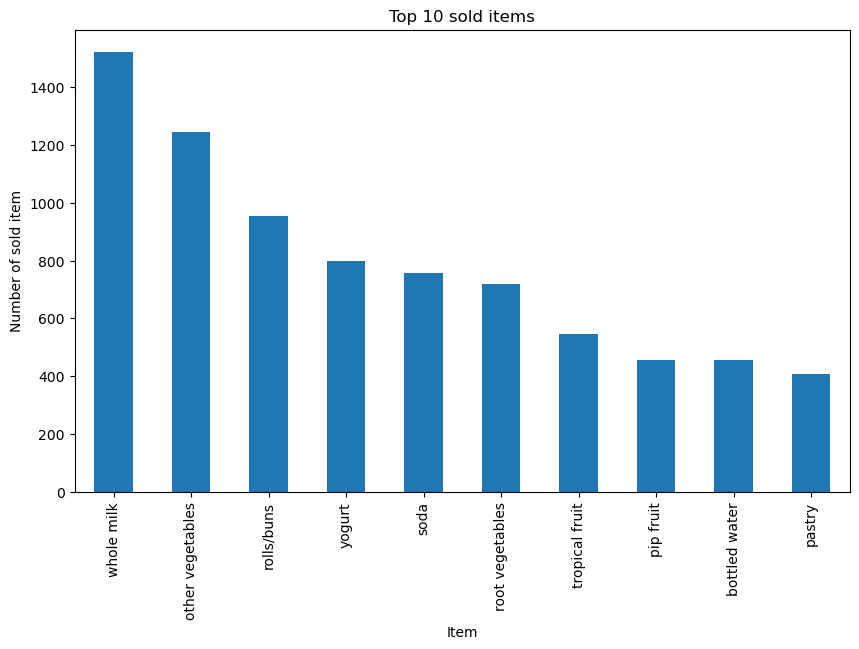

In [8]:
# Retrieve top 10 items
top_items = item_counts.head(10)
# Plot bar for top 10 sold items
plt.figure(figsize=(10,6))
top_items.plot(kind='bar')
plt.title("Top 10 sold items")
plt.xlabel("Item")
plt.ylabel("Number of sold item")
plt.show()

## Data Preparation

In [9]:
from mlxtend.preprocessing import TransactionEncoder

In [10]:
# Make list by grouping items purchased
transactions = daily_transaction_df.groupby('Member_number')['itemDescription'].apply(list).values.tolist()
transactions[0:5] 

[['whole milk',
  'pickled vegetables',
  'misc. beverages',
  'semi-finished bread',
  'hygiene articles',
  'yogurt'],
 ['whole milk', 'soda', 'curd', 'white bread', 'whole milk', 'soda'],
 ['butter', 'frozen vegetables', 'sugar', 'specialty chocolate', 'whole milk'],
 ['root vegetables', 'rolls/buns', 'detergent'],
 ['pip fruit',
  'root vegetables',
  'canned beer',
  'rolls/buns',
  'whole milk',
  'other vegetables',
  'hygiene articles',
  'whole milk',
  'whole milk',
  'frozen fish',
  'red/blush wine']]

In [11]:
# Transform the list
encoder = TransactionEncoder()
encoder_arr = encoder.fit(transactions).transform(transactions)
encoder_arr

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [12]:
# Convert into DataFrame
itemsets = pd.DataFrame(encoder_arr, columns = encoder.columns_)
itemsets.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baking powder,bathroom cleaner,beef,berries,beverages,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [13]:
# Summary of the DataFrame
itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3873 entries, 0 to 3872
Columns: 163 entries, Instant food products to zwieback
dtypes: bool(163)
memory usage: 616.6 KB


## Generate Frequent Itemsets

In [14]:
from mlxtend.frequent_patterns import apriori

In [15]:
# ApplY the Apriori algorithm to find frequent itemsets with a minimum support threshold of 0.05
frequent_itemsets = apriori(itemsets, min_support= 0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.052931,(beef)
1,0.080558,(bottled beer)
2,0.112316,(bottled water)
3,0.078492,(brown bread)
4,0.080041,(butter)
5,0.069713,(canned beer)
6,0.088562,(citrus fruit)
7,0.060935,(coffee)
8,0.052156,(cream cheese )
9,0.072295,(curd)


In [16]:
# Sort frequent itemset in descending order
frequent_itemsets.sort_values('support', ascending = False)

,support,itemsets
26,0.319907,(whole milk)
17,0.275755,(other vegetables)
20,0.216886,(rolls/buns)
27,0.183579,(yogurt)
23,0.174542,(soda)
21,0.163697,(root vegetables)
24,0.133488,(tropical fruit)
2,0.112316,(bottled water)
19,0.109218,(pip fruit)
18,0.097599,(pastry)


In [17]:
# Retrieve the frequent itemsets that contain more than one item
length = frequent_itemsets['itemsets'].str.len()
rows = length > 1
frequent_itemsets[rows]

,support,itemsets
28,0.066357,"(rolls/buns, other vegetables)"
29,0.091918,"(whole milk, other vegetables)"
30,0.053705,"(yogurt, other vegetables)"
31,0.077976,"(rolls/buns, whole milk)"
32,0.055771,"(whole milk, root vegetables)"
33,0.061709,"(whole milk, soda)"
34,0.064033,"(whole milk, yogurt)"


In [18]:
# Observe descriptive statistics
frequent_itemsets.groupby(length)['support'].describe()

,count,mean,std,min,25%,50%,75%,max
itemsets,,,,,,,,
1,28.0,0.107180,0.069639,0.052156,0.061128,0.079267,0.117609,0.319907
2,7.0,0.067353,0.013420,0.053705,0.058740,0.064033,0.072166,0.091918


## Create Association Rules

In [19]:
from mlxtend.frequent_patterns import association_rules

In [20]:
# Create associate rules using the confidence metric with a minimum threshold of 0.25
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.25)

In [21]:
# Sort the rule in descending order
rules.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(rolls/buns),(whole milk),0.216886,0.319907,0.077976,0.359524,1.123838,0.008592,1.061855,0.140710
6,(soda),(whole milk),0.174542,0.319907,0.061709,0.353550,1.105166,0.005872,1.052043,0.115279
7,(yogurt),(whole milk),0.183579,0.319907,0.064033,0.348805,1.090331,0.005305,1.044376,0.101476
5,(root vegetables),(whole milk),0.163697,0.319907,0.055771,0.340694,1.064978,0.003403,1.031529,0.072956
2,(other vegetables),(whole milk),0.275755,0.319907,0.091918,0.333333,1.041969,0.003702,1.020139,0.055615
0,(rolls/buns),(other vegetables),0.216886,0.275755,0.066357,0.305952,1.109507,0.006549,1.043509,0.126034
3,(yogurt),(other vegetables),0.183579,0.275755,0.053705,0.292546,1.060889,0.003082,1.023734,0.070300
1,(whole milk),(other vegetables),0.319907,0.275755,0.091918,0.287328,1.041969,0.003702,1.016239,0.059226


## Evaluate Association Rules

In [22]:
# Observe descriptive statistics
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.216854,0.303350,0.070423,0.327717,1.079831,0.005026,1.036678,0.092700
std,0.054667,0.022851,0.015159,0.028449,0.031659,0.001918,0.016306,0.032493
min,0.163697,0.275755,0.053705,0.287328,1.041969,0.003082,1.016239,0.055615
25%,0.181319,0.275755,0.060225,0.302601,1.056159,0.003627,1.022835,0.067531
50%,0.200232,0.319907,0.065195,0.337014,1.077654,0.004504,1.037519,0.087216
75%,0.231603,0.319907,0.081461,0.349991,1.106251,0.006041,1.046293,0.117968
max,0.319907,0.319907,0.091918,0.359524,1.123838,0.008592,1.061855,0.140710


In [23]:
# Evaluation association rules of top 5 frequent itemsets by lift
rules.sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(rolls/buns),(whole milk),0.216886,0.319907,0.077976,0.359524,1.123838,0.008592,1.061855,0.140710
0,(rolls/buns),(other vegetables),0.216886,0.275755,0.066357,0.305952,1.109507,0.006549,1.043509,0.126034
6,(soda),(whole milk),0.174542,0.319907,0.061709,0.353550,1.105166,0.005872,1.052043,0.115279
7,(yogurt),(whole milk),0.183579,0.319907,0.064033,0.348805,1.090331,0.005305,1.044376,0.101476
5,(root vegetables),(whole milk),0.163697,0.319907,0.055771,0.340694,1.064978,0.003403,1.031529,0.072956


In [24]:
# Evaluation association rules of top 5 frequent itemsets by leverage
rules.sort_values('leverage', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(rolls/buns),(whole milk),0.216886,0.319907,0.077976,0.359524,1.123838,0.008592,1.061855,0.140710
0,(rolls/buns),(other vegetables),0.216886,0.275755,0.066357,0.305952,1.109507,0.006549,1.043509,0.126034
6,(soda),(whole milk),0.174542,0.319907,0.061709,0.353550,1.105166,0.005872,1.052043,0.115279
7,(yogurt),(whole milk),0.183579,0.319907,0.064033,0.348805,1.090331,0.005305,1.044376,0.101476
1,(whole milk),(other vegetables),0.319907,0.275755,0.091918,0.287328,1.041969,0.003702,1.016239,0.059226


In [25]:
# Evaluation association rules of top 5 frequent itemsets by conviction
rules.sort_values('conviction', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(rolls/buns),(whole milk),0.216886,0.319907,0.077976,0.359524,1.123838,0.008592,1.061855,0.140710
6,(soda),(whole milk),0.174542,0.319907,0.061709,0.353550,1.105166,0.005872,1.052043,0.115279
7,(yogurt),(whole milk),0.183579,0.319907,0.064033,0.348805,1.090331,0.005305,1.044376,0.101476
0,(rolls/buns),(other vegetables),0.216886,0.275755,0.066357,0.305952,1.109507,0.006549,1.043509,0.126034
5,(root vegetables),(whole milk),0.163697,0.319907,0.055771,0.340694,1.064978,0.003403,1.031529,0.072956


In [26]:
# Evaluation association rules of top 5 frequent itemsets by zhangs metric
rules.sort_values('zhangs_metric', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(rolls/buns),(whole milk),0.216886,0.319907,0.077976,0.359524,1.123838,0.008592,1.061855,0.140710
0,(rolls/buns),(other vegetables),0.216886,0.275755,0.066357,0.305952,1.109507,0.006549,1.043509,0.126034
6,(soda),(whole milk),0.174542,0.319907,0.061709,0.353550,1.105166,0.005872,1.052043,0.115279
7,(yogurt),(whole milk),0.183579,0.319907,0.064033,0.348805,1.090331,0.005305,1.044376,0.101476
5,(root vegetables),(whole milk),0.163697,0.319907,0.055771,0.340694,1.064978,0.003403,1.031529,0.072956
